# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
df = pd.read_csv('/Users/leyiwang/Desktop/8-pandas-exploration-Ol1viaWang/data/field_for_first_major.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [4]:
df.sample(n=5)

,Label (Grouping),"New York County, New York!!Total!!Estimate","New York County, New York!!Percent!!Estimate","New York County, New York!!Male!!Estimate","New York County, New York!!Percent Male!!Estimate","New York County, New York!!Female!!Estimate","New York County, New York!!Percent Female!!Estimate"
20,Science and Engineering,"50,886",33.6%,"28,684",42.4%,"22,202",26.5%
5,"Arts, Humanities and Others","278,501",35.3%,"117,189",30.9%,"161,312",39.3%
7,25 to 39 years,"349,241",(X),"167,729",(X),"181,512",(X)
8,Science and Engineering,"151,909",43.5%,"85,083",50.7%,"66,826",36.8%
14,Science and Engineering,"99,449",34.4%,"54,042",37.6%,"45,407",31.3%


Observing these 5 random rows of the original data, we can tell that there are some missing values. Placeholders such as '(X)' are used. Besides, many of the field names include special characters like '!!', which is not easy to read and analyze.

In [5]:
df.dtypes

Label (Grouping)                                       object
New York County, New York!!Total!!Estimate             object
New York County, New York!!Percent!!Estimate           object
New York County, New York!!Male!!Estimate              object
New York County, New York!!Percent Male!!Estimate      object
New York County, New York!!Female!!Estimate            object
New York County, New York!!Percent Female!!Estimate    object
dtype: object

There are 7 columns in total and each column is of the data type 'object'. It indicates that each column has text data. Even columns that actually contain numerical data (like 'New York County, New York!!Total!!Estimate') are actually stored as strings. Columns that should be numeric have non-numeric characters such as commas and percentages, causing pandas to interpret them as text.

In [6]:
# check the number of dimensions of data
df.ndim

2

The original data is a 2-dimensional DataFrame.

In [7]:
# check the shape of data
df.shape

(25, 7)

The original data has 25 rows and 7 columns.

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

**Renaming Columns**

In [8]:
# rename each column to make it easy to read, replacing '!' with '_'
new_names = {
    'Label (Grouping)': 'Label',
    'New York County, New York!!Total!!Estimate': 'Total_Estimate',
    'New York County, New York!!Percent!!Estimate': 'Total_Percent',
    'New York County, New York!!Male!!Estimate': 'Male_Estimate',
    'New York County, New York!!Percent Male!!Estimate': 'Male_Percent',
    'New York County, New York!!Female!!Estimate': 'Female_Estimate',
    'New York County, New York!!Percent Female!!Estimate': 'Female_Percent'
}
df.rename(columns=new_names, inplace=True)

As I mentioned above, the original field names are complex and hard to read. Therefore, I decided to rename them to make each column easy to read and understand through either leaving with the most essential part or replacing '!' with '_'.

**Deleting Unnecessary Rows**

In [9]:
# remove 'DETAILED AGE' row
df = df[~df['Label'].str.contains('DETAILED AGE')]

I chose to remove 'DETAILED AGE' row because this row is unnecessary and does not contain any useful information. It merely indicates that the dataset includes specific age group data in addition to overall demographic information.

**Dealing with Placeholders**

In [10]:
# replace '(X)' with '100%'
for col in ['Total_Percent', 'Male_Percent', 'Female_Percent']:
    df[col] = df[col].astype(str).replace({'(X)': '100%'})

Before dealing with the percentage columns, I replaced '(X)' with '100%' as it represents the whole population of that age group.

**Changing Column Types**

In [11]:
# convert percentage columns to floats, removing the percentage sign
for col in ['Total_Percent', 'Male_Percent', 'Female_Percent']:
    df[col] = df[col].str.replace('%', '')
    df[col] = df[col].astype(float)
    df[col] = df[col]

Currently, the data types of percentage columns are text. To better analyze the data, I converted those columns to floats. 

In [12]:
# convert estimate columns to int, removing all commas
for col in ['Total_Estimate', 'Male_Estimate', 'Female_Estimate']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    df[col] = df[col].astype(int)

Currently, the data types of estimate columns are text. To better analyze the data, I converted those columns to numeric.

**Displaying Cleaned Data**

In [18]:
# display 5 sample rows of the modified data
df.sample(n=5)

,Label,Total_Estimate,Total_Percent,Male_Estimate,Male_Percent,Female_Estimate,Female_Percent
8,Science and Engineering,151909,43.5,85083,50.7,66826,36.8
17,Education,10604,3.7,3391,2.4,7213,5.0
13,40 to 64 years,288866,100.0,143821,100.0,145045,100.0
3,Business,144503,18.3,76200,20.1,68303,16.7
15,Science and Engineering Related Fi...,12011,4.2,5399,3.8,6612,4.6


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

**Overall Aggregate Data**

In [34]:
# extract aggregate data
aggregate_data = df.iloc[1:6]

# sort the aggregate data by 'Total_Estimate' to see the largest population groups
sorted_aggregate = aggregate_data.sort_values(by='Total_Estimate', ascending=False)
print(sorted_aggregate[['Label', 'Total_Estimate']])

                                        Label  Total_Estimate
1                     Science and Engineering          302244
5                 Arts, Humanities and Others          278501
3                                    Business          144503
2      Science and Engineering Related Fields           34499
4                                   Education           29702


Firstly, I selected rows 1 through 5, which captures the total population data. Then I sorted the aggregate data by 'Total_Estimate' column in descending order. It helps me to identify the most popular major chosen by people with a Bachelor's degree or higher. Based on the sorted result, it seems that 'Science and Engineering' is the most populous field, followed by 'Arts, Humanities and Others', 'Business', 'Science and Engineering Related Fields', and finally 'Education'. 

**Detailed Age Group Data**

In [35]:
# extract the rows for age group 25 to 39 years
age_25_39 = df.iloc[7:12]

# sort the detailed age group data by 'Total_Percent'
sorted_age_25_39 = age_25_39.sort_values(by='Total_Percent', ascending=False)
print(sorted_age_25_39[['Label', 'Total_Percent']])

                                                Label  Total_Percent
8                             Science and Engineering           43.5
12                        Arts, Humanities and Others           28.4
10                                           Business           21.7
9               Science and Engineering Related Fi...            4.2
11                                          Education            2.1


Here, the focus is on the age group of 25 to 39 years. Similar to the code above, I firstly selected rows 7 through 11. Then I sorted the detailed age group data by 'Total_Percent' column in descending order so that the field with the highest percentage comes first. The field of 'Science and Engineering' is the most represented among the 25 to 39 age group, with a total percentage of 43.5%. 

In [36]:
# extract the rows for age group 40 to 64 years
age_40_64 = df.iloc[13:18]

# sort the detailed age group data by 'Total_Percent'
sorted_age_40_64 = age_40_64.sort_values(by='Total_Percent', ascending=False)
print(sorted_age_40_64[['Label', 'Total_Percent']])

                                                Label  Total_Percent
18                        Arts, Humanities and Others           38.3
14                            Science and Engineering           34.4
16                                           Business           19.5
15              Science and Engineering Related Fi...            4.2
17                                          Education            3.7


Here, the focus is on the age group of 40 to 64 years. Similar to the code above, I firstly selected rows 13 through 17. Then I sorted the detailed age group data by 'Total_Percent' column in descending order so that the field with the highest percentage comes first. Different from the age group of 25 to 39 years, the field of 'Arts, Humanities and Others' is the most represented among the 40 to 64 age group, with a total percentage of 38.3%. 

In [37]:
# extract the rows for age group 65 years and over
age_65_over = df.iloc[19:24]

# sort the detailed age group data by 'Total_Percent'
sorted_age_65_over = age_65_over.sort_values(by='Total_Percent', ascending=False)
print(sorted_age_65_over[['Label', 'Total_Percent']])

                                                Label  Total_Percent
24                        Arts, Humanities and Others           45.4
20                            Science and Engineering           33.6
22                                           Business            8.2
23                                          Education            7.7
21              Science and Engineering Related Fi...            5.1


Here, the focus is on the age group of 65 years and over. Similar to the code above, I firstly selected rows 19 through 23. Then I sorted the detailed age group data by 'Total_Percent' column in descending order so that the field with the highest percentage comes first. Similar to the results from the age group of 40 to 64 years, the field of 'Arts, Humanities and Others' is the most represented among the 65 years and over age group, with a total percentage of 45.4%. 

**Gender Comparisons**

In [38]:
# extract aggregate data
aggregate_data = df.iloc[1:6]

# sort the male aggregate data by 'Male_Percent'
sorted_male_aggregate = aggregate_data.sort_values(by='Male_Percent', ascending=False)
print(sorted_male_aggregate[['Label', 'Male_Percent']])

                                        Label  Male_Percent
1                     Science and Engineering          44.2
5                 Arts, Humanities and Others          30.9
3                                    Business          20.1
2      Science and Engineering Related Fields           2.9
4                                   Education           1.8


Here, I focused on the aggregate data to analyze the distribution of males across different fields. We can tell that the 'Science and Engineering' field has the highest percentage of males at 44.2%, significantly surpassing other majors. Conversely, the 'Education' field has the smallest percentage of males, registering at a mere 1.8%.

In [39]:
# extract aggregate data
aggregate_data = df.iloc[1:6]

# sort the female aggregate data by 'Female_Percent'
sorted_female_aggregate = aggregate_data.sort_values(by='Female_Percent', ascending=False)
print(sorted_female_aggregate[['Label', 'Female_Percent']])

                                        Label  Female_Percent
5                 Arts, Humanities and Others            39.3
1                     Science and Engineering            32.8
3                                    Business            16.7
2      Science and Engineering Related Fields             5.7
4                                   Education             5.6


Here, I focused on the aggregate data to analyze the distribution of females across different fields. We can tell that the 'Arts, Humanities and Others' field has the highest percentage of females at 39.3%. The 'Education' field emerges as the least preferred for females as well, with only 5.6% representation. Similar to the findings among males, 'Education' ranks as the least favored field for declaring a first major. The main difference between female and male preferences lies in the most popular fields chosen.

In [99]:
# locate rows that contain pre-calculated sums for each age group
sum_25_39 = df.iloc[6]
sum_40_64 = df.iloc[12]
sum_65_over = df.iloc[18]

# create a DataFrame
age_group_data = pd.DataFrame({
    'Age Group': ['25 to 39 years', '40 to 64 years', '65 years and over'],
    'Total_Estimate': [sum_25_39['Total_Estimate'], sum_40_64['Total_Estimate'], sum_65_over['Total_Estimate']],
    'Male_Estimate': [sum_25_39['Male_Estimate'], sum_40_64['Male_Estimate'], sum_65_over['Male_Estimate']],
    'Female_Estimate': [sum_25_39['Female_Estimate'], sum_40_64['Female_Estimate'], sum_65_over['Female_Estimate']]
})

print(age_group_trend)

           Age Group  Total_Estimate  Male_Estimate  Female_Estimate
0     25 to 39 years          349241         167729           181512
1     40 to 64 years          288866         143821           145045
2  65 years and over          151342          67689            83653


Firstly, I extracted the pre-calculated total population estimates, as well as the male and female estimates for three age groups respectively: '25 to 39 years', '40 to 64 years', and '65 years and over'. Then I created a DataFrame to compare the population sizes of 25 years and over with a Bachelor's degree or higher across different age groups. The results reveal a descending trend in population size of 25 years and over with a Bachelor's degree or higher as age increases. The total estimate population of the age group of 25 to 39 years is more than 2 times of the total estimate population of the age group of 65 years and over. This trend might reflect that people are valuing education more recently. 

In [58]:
# calculate female proportion
age_group_data['Female_Proportion'] = age_group_data['Female_Estimate'] / age_group_data['Total_Estimate']

sorted_by_female = age_group_data.sort_values(by='Female_Proportion', ascending=False)
print(sorted_by_female[['Age Group', 'Female_Proportion']])

           Age Group  Female_Proportion
2  65 years and over           0.552741
0     25 to 39 years           0.519733
1     40 to 64 years           0.502119


Here, I focused on the proportion of females within each age group. One interesting finding here is that for all three age groups, the female proportion all exceeds 50%, which may indicate that more females went to college than males, perhaps because females value education more than males. 

In [56]:
# calculate the population difference between male and female estimates
aggregate_data['Pop_Diff'] = aggregate_data['Male_Estimate'] - aggregate_data['Female_Estimate']

# calculate the percentage difference relative to the total estimate
aggregate_data['Percent_Diff'] = (aggregate_data['Pop_Diff'] / aggregate_data['Total_Estimate']) * 100

# display the results
aggregate_display = aggregate_data[['Label', 'Pop_Diff', 'Percent_Diff']]
print(aggregate_display)

                                        Label  Pop_Diff  Percent_Diff
1                     Science and Engineering     33374     11.042072
2      Science and Engineering Related Fields    -12135    -35.174933
3                                    Business      7897      5.464938
4                                   Education    -15984    -53.814558
5                 Arts, Humanities and Others    -44123    -15.843031


/var/folders/ht/0rsd328x0k58_grc3jx0hmbh0000gn/T/ipykernel_13397/3275959743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate_data['Pop_Diff'] = aggregate_data['Male_Estimate'] - aggregate_data['Female_Estimate']
/var/folders/ht/0rsd328x0k58_grc3jx0hmbh0000gn/T/ipykernel_13397/3275959743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate_data['Percent_Diff'] = (aggregate_data['Pop_Diff'] / aggregate_data['Total_Estimate']) * 100


Here, I'm trying to understand the gender disparity within the various fields. According to the final results, we can infer that 'Science and Engineering' has a male surplus of 11.04%, indicating a higher proportion of males in this field compared to females. Conversely, 'Science and Engineering Related Fields' and 'Arts, Humanities and Others' show a substantial female surplus of -35.17% and -15.84% respectively, suggesting much higher proportions of females in comparison to males. The field of 'Business' also exhibits gender disparities, but to a much lesser extent. 'Education' stands out with the lowest male percentage, implying a significant female dominance in this field. 

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### Distribution of Fields for First Major

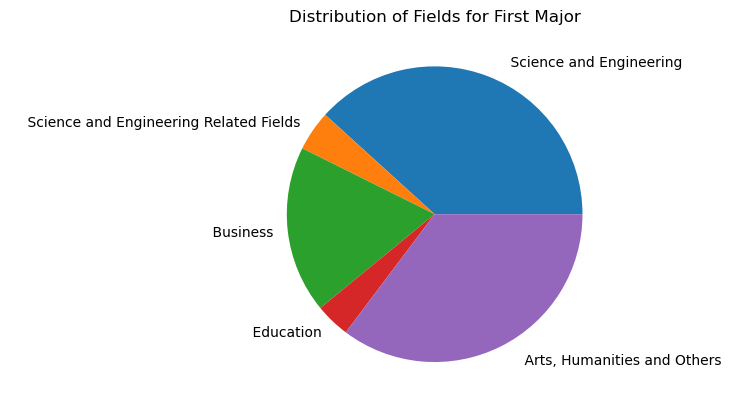

In [82]:
# limit to rows 1 through 5
fields = df['Label'].iloc[1:6]

# sizes for each segment
sizes = df['Total_Percent'].iloc[1:6] 

# create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=fields)

plt.title('Distribution of Fields for First Major')
plt.show()

This pie chart visualizes the total population estimates across different fields, using only the aggregate data.  Each slice of the pie chart corresponds to a different field of study and the size of each slice is proportional to the percentage of individuals in that field. Viewing the pie chart, we can easily recognize the most popular field as 'Science and Engineering'.

### Gender Comparison in the Business Field (Ages 25-39)

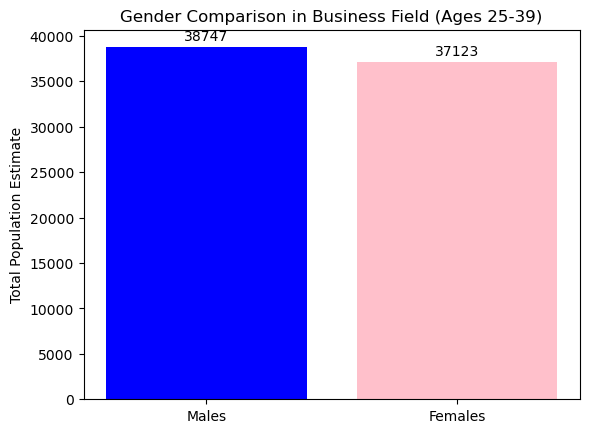

In [78]:
# limit to business major only
business_data = age_25_39[age_25_39['Label'].str.strip() == 'Business']

# extract male and female estimates
male_estimate = business_data['Male_Estimate'].iloc[0]
female_estimate = business_data['Female_Estimate'].iloc[0]

# create a bar chart
fields = ['Males', 'Females']
estimates = [male_estimate, female_estimate]
fig, ax = plt.subplots()
rects = ax.bar(fields, estimates, color=['blue', 'pink'])
ax.set_ylabel('Total Population Estimate')
ax.set_title('Gender Comparison in Business Field (Ages 25-39)')
ax.bar_label(rects, padding=3)
plt.show()

This is a bar chart comparing the total population estimates of males and females in the business field among individuals aged 25-39. The blue bar represents male estimates, while the pink bar corresponds to female estimates. This chart clearly shows that in this age group and field, there is a higher number of males than females.

### Population Trend in 'Arts, Humanities and Others' Field Across Different Age Groups

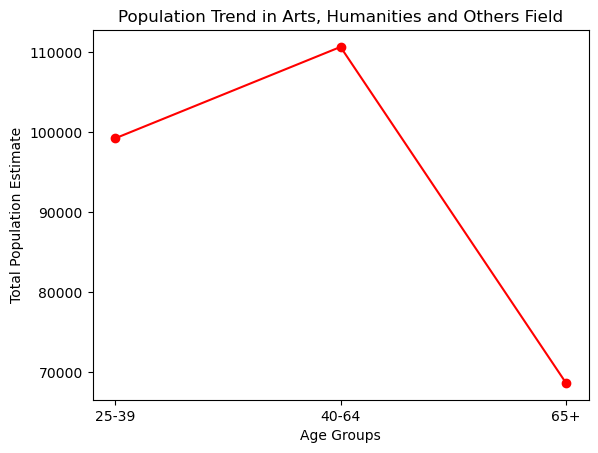

In [80]:
# limit to 'Arts, Humanities and Others' field and find corresponding values
arts_25_39 = age_25_39[age_25_39['Label'].str.contains('Arts, Humanities and Others')]['Total_Estimate'].iloc[0]
arts_40_64 = age_40_64[age_40_64['Label'].str.contains('Arts, Humanities and Others')]['Total_Estimate'].iloc[0]
arts_65_over = age_65_over[age_65_over['Label'].str.contains('Arts, Humanities and Others')]['Total_Estimate'].iloc[0]


fields = ['25-39', '40-64', '65+']
values = [arts_25_39, arts_40_64, arts_65_over]

# create a line plot
fig, ax = plt.subplots()
ax.plot(fields, values, marker='o', linestyle='-', color='red')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Population Estimate')
ax.set_title('Population Trend in Arts, Humanities and Others Field')
plt.show()

This is a line plot analyzing the trend of the population estimate in the 'Arts, Humanities and Others' field across three age groups: '25-39', '40-64', and '65+'. The plot shows an increase from the '25-39' age group to the '40-64' age group, followed by a significant drop from the '40-64' age group to the '65+' age group. 

### Male Proportion Across Age Groups

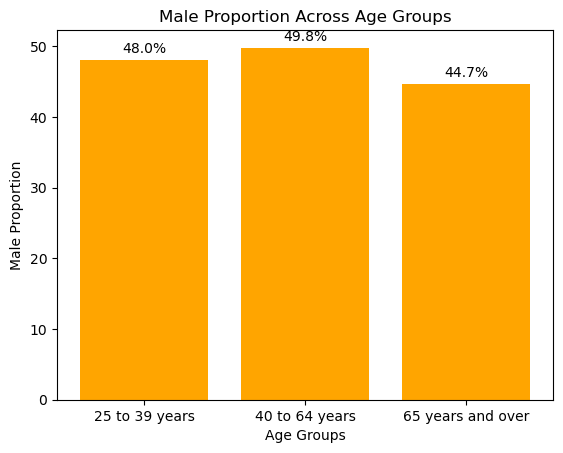

In [86]:
# calculate male proportion for each age group
age_group_data['Male_Proportion'] = (age_group_data['Male_Estimate'] / age_group_data['Total_Estimate']) * 100

# create a bar chart
fig, ax = plt.subplots()
rects = ax.bar(age_group_data['Age Group'], age_group_data['Male_Proportion'], color='orange')

ax.set_xlabel('Age Groups')
ax.set_ylabel('Male Proportion')
ax.set_title('Male Proportion Across Age Groups')
ax.bar_label(rects, padding=3, fmt='%.1f%%')

plt.show()

This a bar chart that displays the proportion of males across different age groups. The chart indicates that the proportion of males decreases slightly from the '40 to 64 years' age group to the '65 years and over' age group. This may reflect that males in the past might be more likely to skip college and choose to work directly after high school. It also shows that across all age groups, the proportion of females is always higher than the proportion of males, as the proportion of males never exceeds 50%.

### Population Estimates for Males and Females Across Age Groups

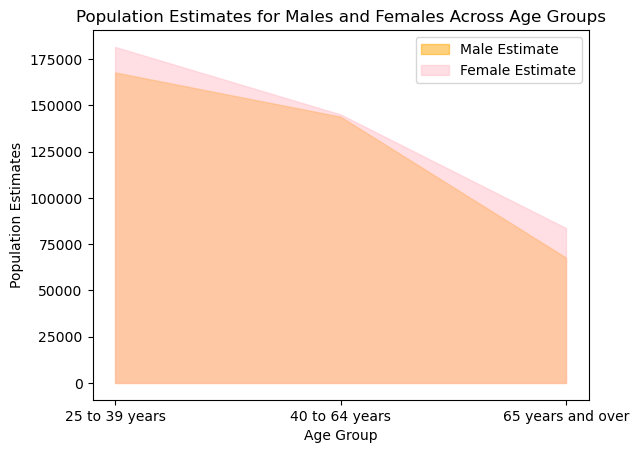

In [98]:
# calculate the population difference between male and female estimates
age_group_data['Pop_Diff'] = age_group_data['Male_Estimate'] - age_group_data['Female_Estimate']

# calculate the percentage difference relative to the total estimate
age_group_data['Percent_Diff'] = (age_group_data['Pop_Diff'] / age_group_data['Total_Estimate']) * 100

# create an area chart
fig, ax = plt.subplots()

# use the absolute value of 'Pop_Diff' to avoid negative area fills if females outnumber males
ax.fill_between(age_group_data['Age Group'], age_group_data['Male_Estimate'], 
                color="orange", alpha=0.5, label='Male Estimate')
ax.fill_between(age_group_data['Age Group'], age_group_data['Female_Estimate'], 
                color="pink", alpha=0.5, label='Female Estimate')

ax.set_xlabel('Age Group')
ax.set_ylabel('Population Estimates')
ax.set_title('Population Estimates for Males and Females Across Age Groups')
ax.legend()
plt.show()

This is an area chart that shows the population estimates for males and females across different age groups. The chart effectively differentiates between male and female estimates, with one color representing males and another representing females, making it easy to see which gender has a larger estimated population in each age group. From this graph, which aligns well with previous chart, we can see that females always have a larger population.